# Explore the post-processing for SWOT discharge

The key things that happen here are recreating discharge estimates just as they will be computed by the Agencies, and computing error stats at each validation gage.

In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/DAWGnotebooks/Path_files', nb_path)
sys.path.insert(0,nb_path)

Mounted at /content/drive


In [2]:
!pwd
import os
os.chdir("/content/drive/My Drive/DAWGnotebooks/dist_4.1")
!pwd

/content
/content/drive/My Drive/DAWGnotebooks/dist_4.1


In [3]:
import os
from pathlib import Path
import json
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
from IPython.display import Image

In [4]:
InputDir=Path('.')

In [5]:
# read in file with all reaches in the domain
reach_json=InputDir.joinpath('reaches.json')
with open(reach_json) as json_file:
    reaches = json.load(json_file)

#extract reach ids
domain_reachids=list()
for reach in reaches:
    domain_reachids.append(reach['reach_id'])

## Offline discharge creation

The offline module currently creates a set of timeseries files, similar to the SWOT.nc files that hold the SWOT observation data. Currently, the unconstrained and constrained discharge are held in separate files. If you want to read the unconstrained discharge, you have to read from files in the offlineq/output_unconstrained directory.

In [6]:
# offline discharge calculations: check out files

offdir=InputDir.joinpath('offlineq')
offdir_unc=offdir.joinpath('output_unconstrained')
offdir_con=offdir.joinpath('output_unconstrained')
off_files_unc=os.listdir(offdir_unc)

print(off_files_unc[0:10]) 

['74266300041_offline.nc', '74267900111_offline.nc', '74267100041_offline.nc', '74270100051_offline.nc', '74269100081_offline.nc', '74266300051_offline.nc', '74267100051_offline.nc', '74267400171_offline.nc', '74267300231_offline.nc', '74267700121_offline.nc']


In [7]:
# check out offline discharge output: note that a discharge exists for each variable, and for the consensus
reach='74264100171'

off_file=offdir_unc.joinpath(reach + '_offline.nc') # this reach is on the Kentucky River

off_dataset = Dataset(off_file)

print(off_dataset)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    reach_id: 74264100171
    dimensions(sizes): nt(36)
    variables(dimensions): int32 nt(nt), float64 d_x_area(nt), float64 d_x_area_u(nt), float64 metro_q_c(nt), float64 bam_q_c(nt), float64 hivdi_q_c(nt), float64 momma_q_c(nt), float64 sads_q_c(nt), float64 consensus_q_c(nt), float64 metro_q_uc(nt), float64 bam_q_uc(nt), float64 hivdi_q_uc(nt), float64 momma_q_uc(nt), float64 sads_q_uc(nt), float64 consensus_q_uc(nt)
    groups: 


In [8]:
# read in all data
for var in off_dataset.variables.values():
    print('Reading ', var.name, ' from ',off_file)
    globals()[var.name] = off_dataset[var.name][:].filled(np.nan)
    
off_dataset.close()

Reading  nt  from  offlineq/output_unconstrained/74264100171_offline.nc
Reading  d_x_area  from  offlineq/output_unconstrained/74264100171_offline.nc
Reading  d_x_area_u  from  offlineq/output_unconstrained/74264100171_offline.nc
Reading  metro_q_c  from  offlineq/output_unconstrained/74264100171_offline.nc
Reading  bam_q_c  from  offlineq/output_unconstrained/74264100171_offline.nc
Reading  hivdi_q_c  from  offlineq/output_unconstrained/74264100171_offline.nc
Reading  momma_q_c  from  offlineq/output_unconstrained/74264100171_offline.nc
Reading  sads_q_c  from  offlineq/output_unconstrained/74264100171_offline.nc
Reading  consensus_q_c  from  offlineq/output_unconstrained/74264100171_offline.nc
Reading  metro_q_uc  from  offlineq/output_unconstrained/74264100171_offline.nc
Reading  bam_q_uc  from  offlineq/output_unconstrained/74264100171_offline.nc
Reading  hivdi_q_uc  from  offlineq/output_unconstrained/74264100171_offline.nc
Reading  momma_q_uc  from  offlineq/output_unconstrained/

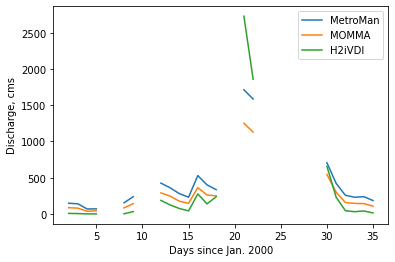

In [9]:
fig,ax=plt.subplots()
ax.plot(nt, metro_q_uc, label="MetroMan")
ax.plot(nt, momma_q_uc, label="MOMMA")
ax.plot(nt, hivdi_q_uc, label="H2iVDI")

plt.ylabel('Discharge, cms')
plt.xlabel('Days since Jan. 2000')
plt.legend()
plt.show()

For reach 74264100171, discharge after the output and stage-2 flow law parameter estimation is similar to the output from stage 1 - see ExploreFLPE notebook>

## Post-diagnostics check

This is one of the few modules not run as party of the Verify Demo. 

## Validation Module

The validation module currently creates a set of files with error stats, as well as figures. 

In [10]:
# validation 

valdir=InputDir.joinpath('validation')
valdir_unc=valdir.joinpath('output_unconstrained')
valdir_con=valdir.joinpath('output_constrained')

valfiles_con_figs=os.listdir(valdir_con.joinpath('figs'))
print(valfiles_con_figs) 

['74267400221_momma_q_c.jpg', '74267400171_momma_q_c.jpg', '74267400291_momma_q_c.jpg', '74267400281_momma_q_c.jpg', '74267400341_momma_q_c.jpg', '74267400451_momma_q_c.jpg', '74267400321_momma_q_c.jpg', '74267400061_momma_q_c.jpg', '74267400391_momma_q_c.jpg', '74267400241_metroman_q_c.jpg', '74267400381_momma_q_c.jpg', '74267400241_momma_q_c.jpg', '74267400081_momma_q_c.jpg', '74267400411_momma_q_c.jpg', '74267400151_metroman_q_c.jpg', '74267400361_momma_q_c.jpg', '74267400151_momma_q_c.jpg', '74267400151_hivdi_q_c.jpg', '74267400131_momma_q_c.jpg', '74267400131_hivdi_q_c.jpg', '74267400201_momma_q_c.jpg', '74267400131_metroman_q_c.jpg', '74267400261_metroman_q_c.jpg', '74267400181_momma_q_c.jpg', '74267400261_momma_q_c.jpg', '74267400471_momma_q_c.jpg', '74267400311_momma_q_c.jpg']


In [11]:
valfiles_con_stats=os.listdir(valdir_con.joinpath('stats'))
print(valfiles_con_stats) 

['74267100051_validation.nc', '74270100051_validation.nc', '74267400221_validation.nc', '74267400171_validation.nc', '74267400291_validation.nc', '74267400281_validation.nc', '74267400341_validation.nc', '74267400451_validation.nc', '74267400321_validation.nc', '74267400061_validation.nc', '74267400381_validation.nc', '74267400391_validation.nc', '74267400241_validation.nc', '74267400081_validation.nc', '74267400411_validation.nc', '74267400151_validation.nc', '74267400361_validation.nc', '74267400201_validation.nc', '74267400131_validation.nc', '74267400181_validation.nc', '74267400261_validation.nc', '74267400471_validation.nc', '74267400311_validation.nc']


In [12]:
# check out file structure

reachid='74267100051'

valfile=valdir_con.joinpath('stats').joinpath(reachid + '_validation.nc') # this reach is on the Kentucky River

valdataset = Dataset(valfile)

print(valdataset)

valdataset.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    reach_id: 74267100051
    description: Statistics for reach: 74267100051
    history: 20-Jun-2022 17:58:21
    has_validation: 0
    gage_type: NO DATA
    dimensions(sizes): num_algos(0), nchar(0)
    variables(dimensions): 
    groups: 


In this initial version, the validation module does not include the data it's extracted from the offline discharge and the validation modules. So we'll just display some of the timeseries files it's created, and then analyze the statistics.

In [13]:
Image(valdir_con.joinpath('figs').joinpath('74267400181_momma_q_c.jpg'))

/usr/local/lib/python3.7/dist-packages/IPython/core/formatters.py:364: FormatterWarning: image/png formatter returned invalid type <class 'pathlib.PosixPath'> (expected (<class 'bytes'>, <class 'str'>)) for object: <IPython.core.display.Image object>
  FormatterWarning


<IPython.core.display.Image object>